Installing package

In [23]:
!py -m pip install kaggle

  Using cached kaggle-1.6.12.tar.gz (79 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for python-slugify from https://files.pythonhosted.org/packages/a4/62/02da182e544a51a5c3ccf4b03ab79df279f9c60c5e82d5e8bec7ca26ac11/python_slugify-8.0.4-py2.py3-none-any.whl.metadata
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Obtaining dependency information for text-unidecode>=1.3 from https://files.pythonhosted.org/packages/a6/a5/c0b6468d3824fe3fde30dbb5e1f687b291608f9473681bbf7dabbf5a87d7/text_unidecode-1.3-py2.py3-none-any.whl.metadata
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102996 sha256=4301e261f5c6cbfa776c436e84a7d786b4009b97dd2fd80e05316a7210


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# !pip install opencv-python
!py -m pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is CEC8-FC94

 Directory of c:\Users\user\Documents\project-pmka

17/05/2024  05:57    <DIR>          .
17/05/2024  05:57    <DIR>          ..
14/05/2024  22:27                64 kaggle.json
17/05/2024  05:56         1.428.130 PMKA_final_project.ipynb
               2 File(s)      1.428.194 bytes
               2 Dir(s)  319.808.811.008 bytes free


In [3]:
%ls /root/.kaggle

Parameter format not correct - "root".


In [5]:
!mv kaggle.json kaggle/kaggle.json

'mv' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!chmod 600 kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


Load package

In [60]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import kaggle

In [133]:
import PIL, os, shutil, pathlib, re
import tensorflow as tf, cv2 as cv
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
kaggle.api.dataset_download_files('tawsifurrahman/tuberculosis-tb-chest-xray-dataset', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset


Load Data (1)

In [65]:
img_dir = pathlib.Path('TB_Chest_Radiography_Database')
count_image = len(list(img_dir.glob('Tuberculosis/*.png')))
count_image

700

In [66]:
normal = list(img_dir.glob('Normal/*'))
tbc = list(img_dir.glob('Tuberculosis/*'))

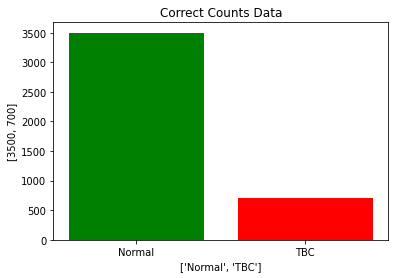

In [67]:
categories = ['Normal', 'TBC']
values = [len(normal), len(tbc)]
colors = ['green', 'red', 'orange']

# Create bar plot
plt.bar(categories, values, color=colors)
plt.xlabel(categories)
plt.ylabel(values)
plt.title('Correct Counts Data')
plt.show()

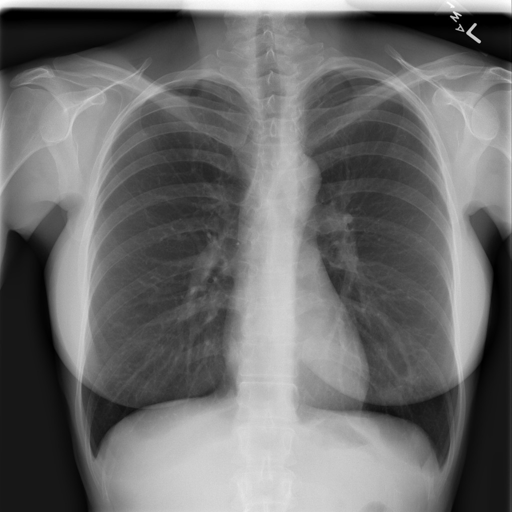

In [72]:
PIL.Image.open(normal[3])

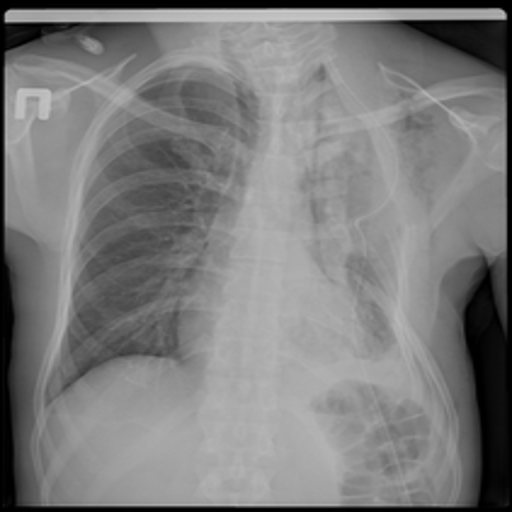

In [74]:
PIL.Image.open(tbc[8])

In [75]:
batch_size = 32
img_height = img_width = 224

In [112]:
train_dataset = image_dataset_from_directory(
    f'{img_dir}/originally',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Create the dataset for validation
val_dataset = image_dataset_from_directory(
    f'{img_dir}/originally',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Create the dataset for testing
test_dataset = image_dataset_from_directory(
    f'{img_dir}/originally',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 4200 files belonging to 2 classes.


Using 3360 files for training.
Found 4200 files belonging to 2 classes.
Using 840 files for validation.
Found 4200 files belonging to 2 classes.
Using 3360 files for training.


In [83]:
classes = train_dataset.class_names
classes

['Normal', 'Tuberculosis']

In [78]:
def show_img(data):
  plt.figure(figsize=(10, 10))
  for img, labels in data.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i+1)
      plt.imshow(img[i].numpy().astype('uint8'))
      plt.title(classes[labels[i]])
      plt.axis('off')

  return plt.show()

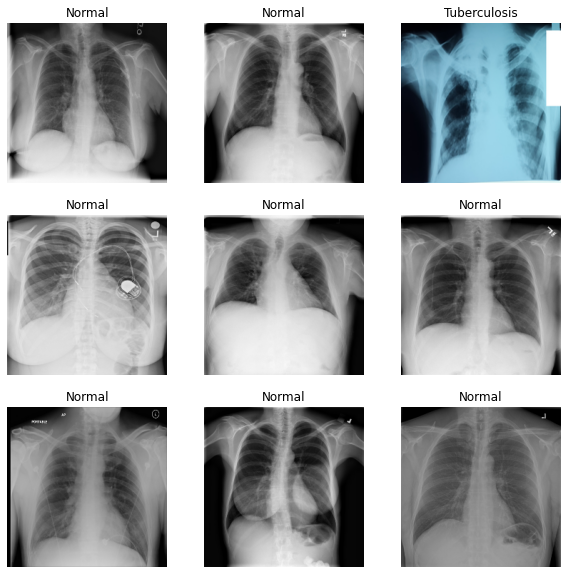

In [84]:
show_img(train_dataset)

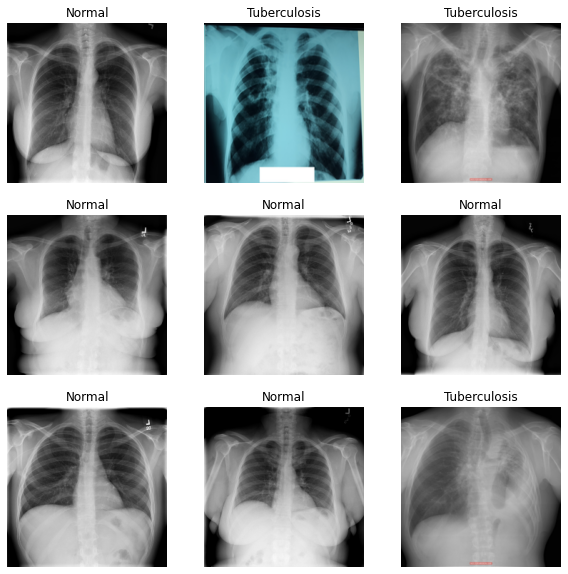

In [85]:
show_img(val_dataset)

Load data (2)

In [45]:
for folder in ['train', 'test', 'val']:
    os.makedirs(os.path.join(img_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(img_dir, folder), exist_ok=True)

# Loop through the normal and tuberculosis folders
for category in ['Normal', 'Tuberculosis']:
    # Get list of image filenames in the current category folder
    image_filenames = os.listdir(os.path.join(img_dir, category))
    
    # Split filenames into train, test, and val sets
    train_filenames, test_val_filenames = train_test_split(image_filenames, test_size=0.2, random_state=42)
    test_filenames, val_filenames = train_test_split(test_val_filenames, test_size=0.5, random_state=42)
    
    # Move images to train, test, and val folders
    for filename in train_filenames:
        shutil.copy(os.path.join(img_dir, category, filename), os.path.join(img_dir, 'train', filename))
    for filename in test_filenames:
        shutil.copy(os.path.join(img_dir, category, filename), os.path.join(img_dir, 'test', filename))
    for filename in val_filenames:
        shutil.copy(os.path.join(img_dir, category, filename), os.path.join(img_dir, 'val', filename))

In [209]:
def ensure_labeling(text):
    match = re.search(r"\bNormal\b", text)
    return 'normal' if match else 'tuberculosis'

def read_dataframe(tipe_data):
    image_filenames = os.listdir(os.path.join(img_dir, tipe_data))

    df = pd.DataFrame({
        'listdir': image_filenames
    })

    df['labels'] = df['listdir'].apply(lambda x: ensure_labeling(x))

    return df

In [210]:
train_set = read_dataframe('train')
test_set = read_dataframe('test')
val_set = read_dataframe('val')

Image Processing

In [241]:
def update_listdir(img_dir, tipe_class):
    listdir = os.listdir(os.path.join(img_dir, tipe_class))
    class_names = train_set['labels'].values if tipe_class == 'train' else test_set['labels'].values if tipe_class == 'test' else val_set['labels'].values
    return [f'{img_dir}/{tipe_class}/{myDir}' for myDir in listdir], class_names

In [254]:
myData, myLabels = update_listdir(img_dir, 'train')
myData[1000:1160]

['TB_Chest_Radiography_Database/train/Normal-2158.png',
 'TB_Chest_Radiography_Database/train/Normal-216.png',
 'TB_Chest_Radiography_Database/train/Normal-2160.png',
 'TB_Chest_Radiography_Database/train/Normal-2161.png',
 'TB_Chest_Radiography_Database/train/Normal-2162.png',
 'TB_Chest_Radiography_Database/train/Normal-2163.png',
 'TB_Chest_Radiography_Database/train/Normal-2165.png',
 'TB_Chest_Radiography_Database/train/Normal-2166.png',
 'TB_Chest_Radiography_Database/train/Normal-2167.png',
 'TB_Chest_Radiography_Database/train/Normal-2168.png',
 'TB_Chest_Radiography_Database/train/Normal-2169.png',
 'TB_Chest_Radiography_Database/train/Normal-217.png',
 'TB_Chest_Radiography_Database/train/Normal-2170.png',
 'TB_Chest_Radiography_Database/train/Normal-2171.png',
 'TB_Chest_Radiography_Database/train/Normal-2172.png',
 'TB_Chest_Radiography_Database/train/Normal-2173.png',
 'TB_Chest_Radiography_Database/train/Normal-2174.png',
 'TB_Chest_Radiography_Database/train/Normal-2175.

In [245]:
myLabels[0:3]

array(['normal', 'normal', 'normal'], dtype=object)

Text(0.5, 1.0, 'tuberculosis')

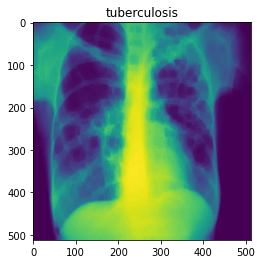

In [259]:
img = cv.imread(myData[3200])
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.equalizeHist(img) #meningkatkan kecerahan gambar
kernel = np.ones((5, 5), np.uint8) #menentukan bentuk dan ukuran dari area yang akan diproses selama operasi erosi
# img = cv.erode(img, kernel, iterations=3) #mengurangi ukuran objek dan dapat menghilangkan titik-titik kecil atau garis tipis
img = cv.erode(img, kernel, iterations = 2)
plt.imshow(img)
plt.title(myLabels[3200])

In [262]:
def preprocessing_img(data):
    myPixels = []

    # Proses setiap gambar
    for i in range(len(data)):
        img = cv.imread(data[i])
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # convert gray
        img = cv.equalizeHist(img) #meningkatkan kecerahan gambar
        kernel = np.ones((5, 5), np.uint8) #menentukan bentuk dan ukuran dari area yang akan diproses selama operasi erosi
        img = cv.erode(img, kernel, iterations=3) #mengurangi ukuran objek dan dapat menghilangkan titik-titik kecil atau garis tipis
        # img = cv.dilate(img, kernel, iterations = 2)
        img = cv.addWeighted(img, 4, cv.GaussianBlur(img, (0, 0), 512/10), -4, 128)
        myPixels.append(img)

    # Konversi ke array numpy
    myPixels = np.array(myPixels)

    return myPixels

def show_img_preprocess(data):
    # Tampilkan gambar dalam grid
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data[i])
        plt.title(myLabels[i])
        plt.axis('off')

    return plt.show()

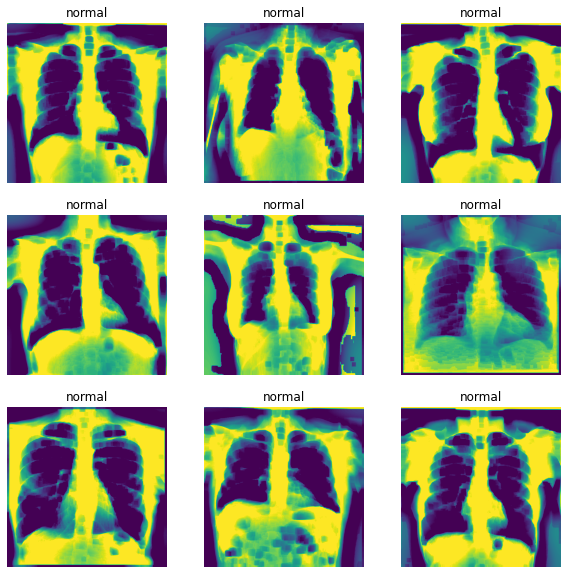

In [263]:
myPixels = preprocessing_img(myData)
show_img_preprocess(myPixels)

Text(0.5, 1.0, 'tuberculosis')

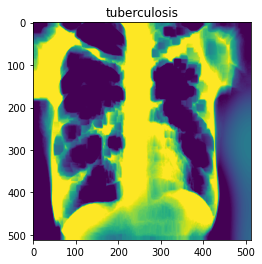

In [265]:
plt.imshow(myPixels[3200])
plt.title(myLabels[3200])